# Analyze the Document Term Matrix

This notebook continues our analysis of document similarity based on shared entries.

Note: This notebook uses the R Kernel. See `03_analyze_sections.ipynb` for further instructions concerning installing the R kernel and loading libraries.

In [1]:
# To load libraries in the R kernel in Jupyter Notebooks, you need to know
# where your Jupyter Notebook is looking for libraries (the library path).
# Often, there will be two locations where R libraries are installedf. 
# You can find all of these locations by running the following command.
.libPaths()

[1] "/Users/veldhuis/Library/R/3.2/library"                         
[2] "/Library/Frameworks/R.framework/Versions/3.2/Resources/library"

In [2]:
# set the variable `lib.dir` to one of your library paths
lib.dir = '/Library/Frameworks/R.framework/Versions/3.2/Resources/library'

In [3]:
# load libraries for packages used in this notebook
library(ggplot2, lib.loc = lib.dir)
library(ggdendro, lib.loc = lib.dir)
library(reshape, lib.loc = lib.dir)
library(scales, lib.loc = lib.dir)

# Note, you need to install these packages first. If you haven't already
# done that, see `03_analyze_sections.ipynb`. 

Warning message:
“package ‘ggplot2’ was built under R version 3.2.5”Warning message:
“package ‘ggdendro’ was built under R version 3.2.5”Warning message:
“package ‘reshape’ was built under R version 3.2.5”Warning message:
“package ‘scales’ was built under R version 3.2.5”

# Note to Erin
I have hard-coded the file `Q39_par_dtm.csv` here - should give the user a choice.

# Note to Niek 
Unfortunately, the interactive input function for R doesn't work in Jupyter Notebook. Another thing for our 10 tips paper I guess.

In [4]:
# Provide a filename. 
# This doesn't work yet. readline() isn't interactive in Jupyter Notebook!
# filename = readline(prompt = "Filename: ")

In [5]:
# Read in dtm from file output by previous notebook.
dtm_df = read.csv('../data/pass/Q39_par_dtm.csv', 
                  stringsAsFactors = F, row.names = 1) 

## Check how R parsed the DTM 
- R doesn't allow variable names to start with a number. Entries starting with a number had "X" added to the beggining of the entry name.  
- R doesn't allow parentheses or brackets in variable names, so entries like "1(ban₂)[na]na" parsed as "X1.ban...na.na".   

In a later cell, we will sum the columns and rows to get an idea of the
density of the matrix. In order to avoid iteratively summing the summary 
column and summary row, we need to set variables specifying the 
columns and rows we want to sum. This needs to be a separate cell from
the cell in which we actually do the summing.

In [7]:
cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

head(dtm_df)
dim(dtm_df) 
# The call to dim should not change if you run this cell multiple times. 
# If it does, there is a problem.

X1.2.na.na_giŋ.unit.n X5.6.na.na_sila.unit.n a.arm.n_apin.plow.n
P117395 0                     0                      0                  
P117404 0                     0                      0                  
P128345 0                     0                      0                  
P224980 0                     0                      0                  
P224986 0                     0                      0                  
P224994 0                     0                      0                  
        a.arm.n_diš.na.na a.arm.n_gud.ox.n_apin.plow.n
P117395 0                 0                           
P117404 0                 0                           
P128345 0                 0                           
P224980 0                 0                           
P224986 0                 0                           
P224994 0                 0                           
        a.arm.n_umbin.wheel.n_margida.cart.n a.arm.n_ŋešrin.scales.n ab.cow.n
P117395 0                                    0                       0       
P117404 0                                    0                       0       
P128345 0                                    0                       0       
P224980 0                                    0                       0       
P224986 0                                    0                       0       
P224994 0                                    0                       0       
        ab.cow.n_ib.hips.n_gig.sick.v.i ab.cow.n_mah.mature.v.i ⋯
P117395 0                               0                       ⋯
P117404 0                               0                       ⋯
P128345 0                               0                       ⋯
P224980 0                               0                       ⋯
P224986 0                               0                       ⋯
P224994 0                               0                       ⋯
        šuʾa.stool.n_burgul.stone.cutter.n šuʾa.stool.n_dus.bathroom.n
P117395 0                                  0                          
P117404 0                                  0                          
P128345 0                                  0                          
P224980 0                                  0                          
P224986 0                                  0                          
P224994 0                                  0                          
        šuʾa.stool.n_kaskal.way.n šuʾa.stool.n_nagar.carpenter.n
P117395 0                         0                             
P117404 0                         0                             
P128345 0                         0                             
P224980 0                         0                             
P224986 0                         0                             
P224994 0                         0                             
        šuʾa.stool.n_niŋgula.greatness.n šuʾa.stool.n_suhsah.sound.n
P117395 0                                0                          
P117404 0                                0                          
P128345 0                                0                          
P224980 0                                0                          
P224986 0                                0                          
P224994 0                                0                          
        šuʾa.stool.n_tibira.sculptor.n šuʾa.stool.n_x.na.na
P117395 0                              0                   
P117404 0                              0                   
P128345 0                              0                   
P224980 0                              0                   
P224986 0                              0                   
P224994 0                              0                   
        šuʾa.stool.n_šu.hand.n šuʾa.stool.n_šuʾi.barber.n
P117395 0                      0                         
P117404 0                      0                         
P128345 0                      0                         
P224980 0        

[1]  138 3375

## Check density of DTM

Look at distribution of document lengths (number of entries per document).  
Also look at distribution of entry frequency (number of documents each entry appears in).

In [8]:
# Add a column showing the number of entries in each document.
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])

# Add a row showing the number of occurrences of each entry.
dtm_df["num_occurrences",] = colSums(dtm_df[1:rows_to_sum,])

# The intersection of these two summaries is meaningless, set to NA.
dtm_df["num_occurrences","num_entries"] = NA 

[1] "There are 56 documents with 10 or more entries."
[1] "There are 22 documents with 100 or more entries."


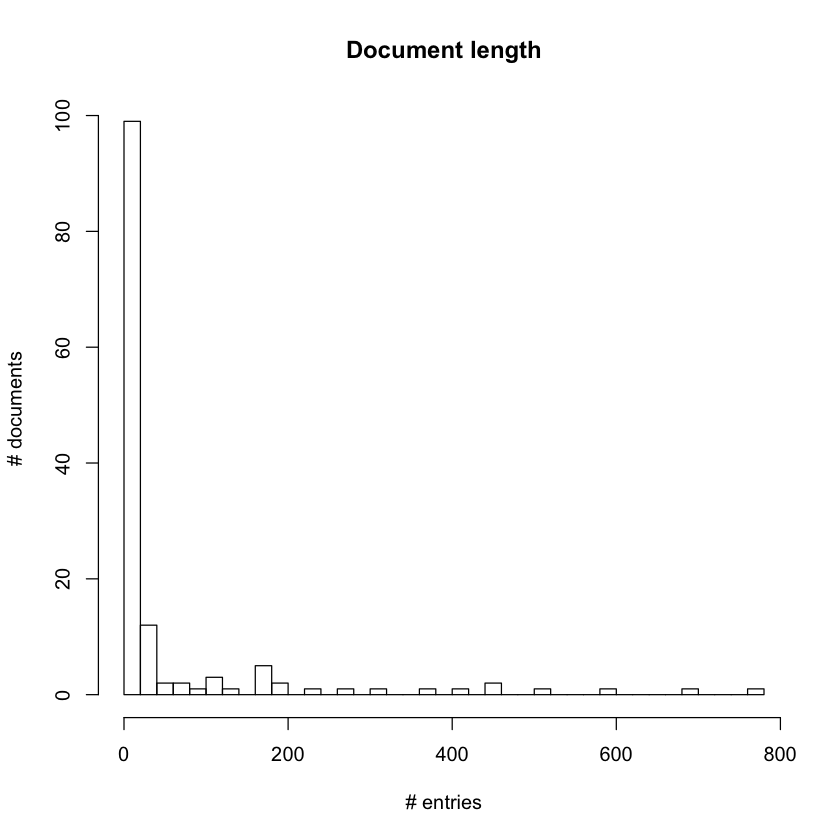

In [9]:
hist(dtm_df$num_entries, breaks = 30, main = "Document length", 
    ylab = "# documents", xlab = "# entries")

# Print out some summary statements.
print(paste("There are", length(which(dtm_df$num_entries >= 10)), "documents with 10 or more entries."))
print(paste("There are", length(which(dtm_df$num_entries >= 100)), "documents with 100 or more entries."))

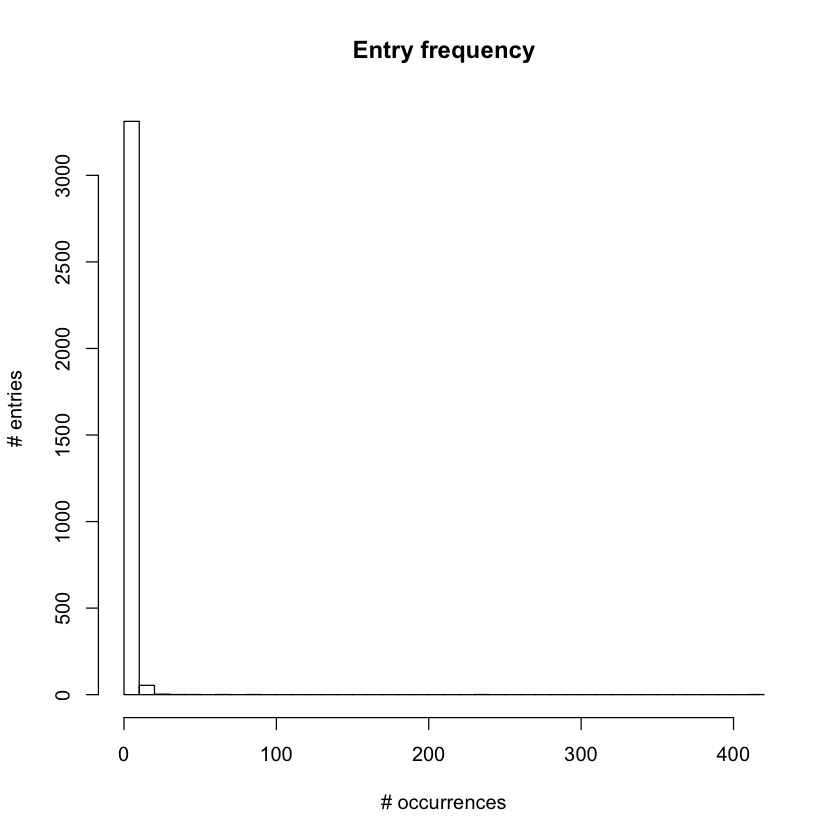

[1] "78.4% of entries appear only once or twice across the corpus"
[1] "83 entries occur in 10 or more documents"
[1] "including one that occurs 416 times across the 138 documents"
[1] "The most common entry is unknown"


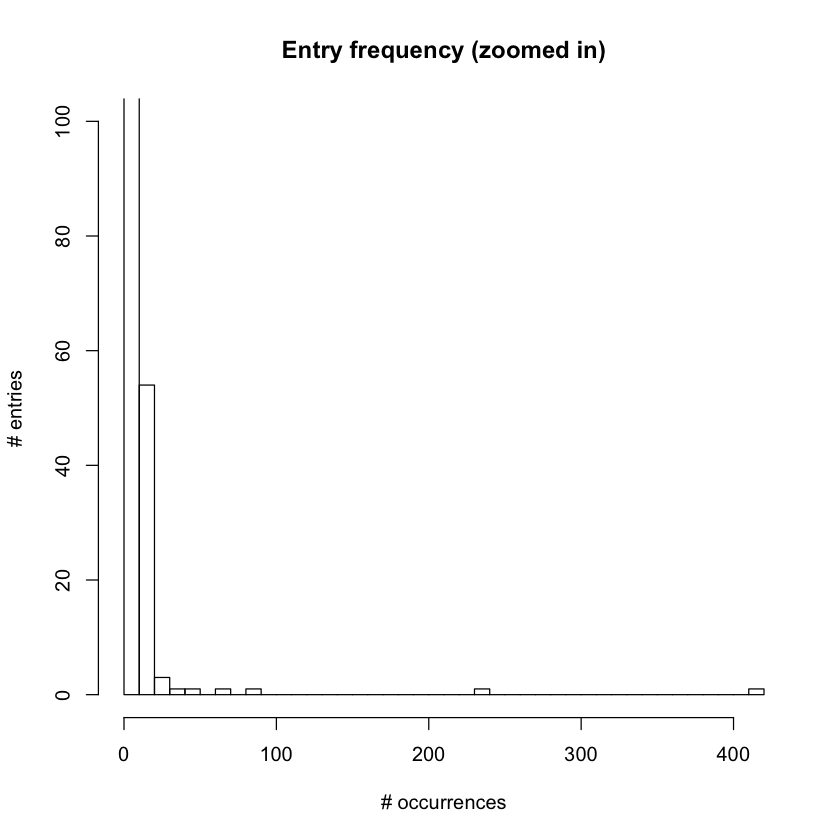

In [10]:
num_occurrences = unlist(dtm_df["num_occurrences",])
hist(num_occurrences, breaks = 30, main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurrences")
hist(num_occurrences, breaks = 30, ylim = c(0, 100), 
     main = "Entry frequency (zoomed in)", 
    ylab = "# entries", xlab = "# occurrences")

rare = round(length(which(dtm_df["num_occurrences",] <=2))/cols_to_sum*100,2)
common_entries = colnames(dtm_df[which(dtm_df["num_occurrences",] >=10)])
most_common = max(dtm_df["num_occurrences",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurrences",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(length(common_entries), "entries occur in 10 or more documents"))
print(paste("including one that occurs", most_common, "times across the", rows_to_sum, "documents"))
print(paste("The most common entry is", most_common_entry))

Here we inspect the most common entries (those that appear at least ten times across the corpus) to see if they make sense.

In [11]:
# Look at some of the most common entries
common_entries

[1] "al.hoe.n"                           "al.hoe.n_zu.tooth.n_eš.three.nu"   
 [3] "al.hoe.n_zu.tooth.n_limmu.four.nu"  "al.hoe.n_zu.tooth.n_min.two.nu"    
 [5] "allanum.oak.n"                      "apin.plow.n_tugsaga.plow.n"        
 [7] "apin.plow.n_šu.hand.n"              "apin.plow.n_šudu.equipped.aj"      
 [9] "buniŋ.trough.n_x.na.na"             "dih.weed.n"                        
[11] "dilim.spoon.n"                      "e.house.n_gigir.chariot.n"         
[13] "ellag.ball.n"                       "esi.tree.n"                        
[15] "gigir.chariot.n"                    "girim.flower.n"                    
[17] "guza.chair.n"                       "guza.chair.n_gid.long.v.i"         
[19] "guza.chair.n_x.na.na"               "halub.tree.n"                      
[21] "hašhur.apple.n"                     "hašhur.apple.n_armanu.tree.n"      
[23] "hašhur.apple.n_kur.mountain.n"      "ildag.poplar.n"                    
[25] "ildag.poplar.n_kur.mountain.n"      "ilianum.tree.n"                    
[27] "kid.da.twig.n"                      "kur.wood.n"                        
[29] "lamgal.nut.n"                       "lamtur.nut.n"                      
[31] "ligima.shoot.n"                     "ma.ship.n_niš.twenty.nu_gur.unit.n"
[33] "ma.ship.n_u.ten.nu_gur.unit.n"      "ma.ship.n_x.na.na"                 
[35] "madal.pole.n"                       "manu.wood.n"                       
[37] "margida.cart.n"                     "maš.plant.n"                       
[39] "mes.tree.n"                         "mud.stump.n_ŋešnimbar.palm.n"      
[41] "naŋa.mortar.n"                      "pa.branch.n_ŋešnimbar.palm.n"      
[43] "peš.fig.n"                          "su.fibers.n_ŋešnimbar.palm.n"      
[45] "sugin.rot.n"                        "sumungi.tool.n"                    
[47] "taškarin.boxwood.n"                 "tiʾarum.tree.n"                    
[49] "tubala.harness.n_ŋešnimbar.palm.n"  "unknown"                           
[51] "urnum.cedar.n"                      "x.x.na.na"                         
[53] "x.na.na"                            "x.na.na_margida.cart.n"            
[55] "x.na.na_ŋešnimbar.palm.n"           "zena.midrib.n_ŋešnimbar.palm.n"    
[57] "zirdum.olive.n"                     "X.ŋeš.kal.na.na"                   
[59] "X.ŋeš.x.x.x.na.na"                  "X.ŋeš.x.x.na.na"                   
[61] "X.ŋeš.x.na.na"                      "X.ŋeš.x.na.na_apin.plow.n"         
[63] "X.ŋeš.x.na.na_x.na.na"              "ŋešaʾabak.tree.n"                  
[65] "ŋešgana.tree.n"                     "ŋešgana.tree.n_babbar.white.v.i"   
[67] "ŋešgana.tree.n_giggi.black.v.i"     "ŋešnimbar.palm.n"                  
[69] "ŋešnimbar.palm.n_al.x.na.na"        "ŋešnimbar.palm.n_x.x.na.na"        
[71] "ŋešnimbar.palm.n_x.na.na"           "ŋešnimbar.palm.n_šeŋ.cook.v.t"     
[73] "ŋeštin.vine.n"                      "ŋeštinguruma..vine.n"              
[75] "ŋeštinkaʾa.grape.n"                 "ŋeštinkira.berry.n"                
[77] "ŋipar.tree.n"                       "ŋirigub.footstool.n"               
[79] "šag.heart.n_ŋešnimbar.palm.n"       "šagkal.tree.n"                     
[81] "šedug.tree.n"                       "šennur.plum.n"                     
[83] "šenu.tree.n"

As seen from the output above, many of the most common entries include
either unlematizable or illegible words (represented as x.x.na.na). 
These are not particularly informative. We want to remove these entries from the analysis. Also remove the entry "unknown".

In [12]:
# remove na.na entries
entries_with_na = grep("na.na", colnames(dtm_df))

if(length(entries_with_na) > 0) {
dtm_df = dtm_df[,-entries_with_na]
dtm_df$unknown = NULL
    }

head(dtm_df)

a.arm.n_apin.plow.n a.arm.n_gud.ox.n_apin.plow.n
P117395 0                   0                           
P117404 0                   0                           
P128345 0                   0                           
P224980 0                   0                           
P224986 0                   0                           
P224994 0                   0                           
        a.arm.n_umbin.wheel.n_margida.cart.n a.arm.n_ŋešrin.scales.n ab.cow.n
P117395 0                                    0                       0       
P117404 0                                    0                       0       
P128345 0                                    0                       0       
P224980 0                                    0                       0       
P224986 0                                    0                       0       
P224994 0                                    0                       0       
        ab.cow.n_ib.hips.n_gig.sick.v.i ab.cow.n_mah.mature.v.i
P117395 0                               0                      
P117404 0                               0                      
P128345 0                               0                      
P224980 0                               0                      
P224986 0                               0                      
P224994 0                               0                      
        ab.cow.n_peš.thick.v.i ab.cow.n_si.horn.n_ŋal.be.v.i
P117395 0                      0                            
P117404 0                      0                            
P128345 0                      0                            
P224980 0                      0                            
P224986 0                      0                            
P224994 0                      0                            
        ab.cow.n_suhub..oxen.n ⋯ šuʾa.stool.n_burgul.stone.cutter.n
P117395 0                      ⋯ 0                                 
P117404 0                      ⋯ 0                                 
P128345 0                      ⋯ 0                                 
P224980 0                      ⋯ 0                                 
P224986 0                      ⋯ 0                                 
P224994 0                      ⋯ 0                                 
        šuʾa.stool.n_dus.bathroom.n šuʾa.stool.n_kaskal.way.n
P117395 0                           0                        
P117404 0                           0                        
P128345 0                           0                        
P224980 0                           0                        
P224986 0                           0                        
P224994 0                           0                        
        šuʾa.stool.n_nagar.carpenter.n šuʾa.stool.n_niŋgula.greatness.n
P117395 0                              0                               
P117404 0                              0                               
P128345 0                              0                               
P224980 0                              0                               
P224986 0                              0                               
P224994 0                              0                               
        šuʾa.stool.n_suhsah.sound.n šuʾa.stool.n_tibira.sculptor.n
P117395 0                           0                             
P117404 0                           0                             
P128345 0                           0                             
P224980 0                           0                             
P224986 0                           0                             
P224994 0                           0                             
        šuʾa.stool.n_šu.hand.n šuʾa.stool.n_šuʾi.barber.n num_entries
P117395 0                      0                          3          
P117404 0                      0                          3          
P128345 0                      0                          3          
P224980 0                

Look again at entry frequency after removing these entries.

In [13]:
# Remove summary column and row
dtm_df$num_entries = NULL
dtm_df = dtm_df[-which(rownames(dtm_df) == "num_occurrences"),]

cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

In [14]:
# Add a column showing the number of entries in each document.
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])

# Add a row showing the number of occurances of each entry.
dtm_df["num_occurrences",] = colSums(dtm_df[1:rows_to_sum,])

# The intersection of these two summaries is meaningless, set to NA.
dtm_df["num_occurrences","num_entries"] = NA 

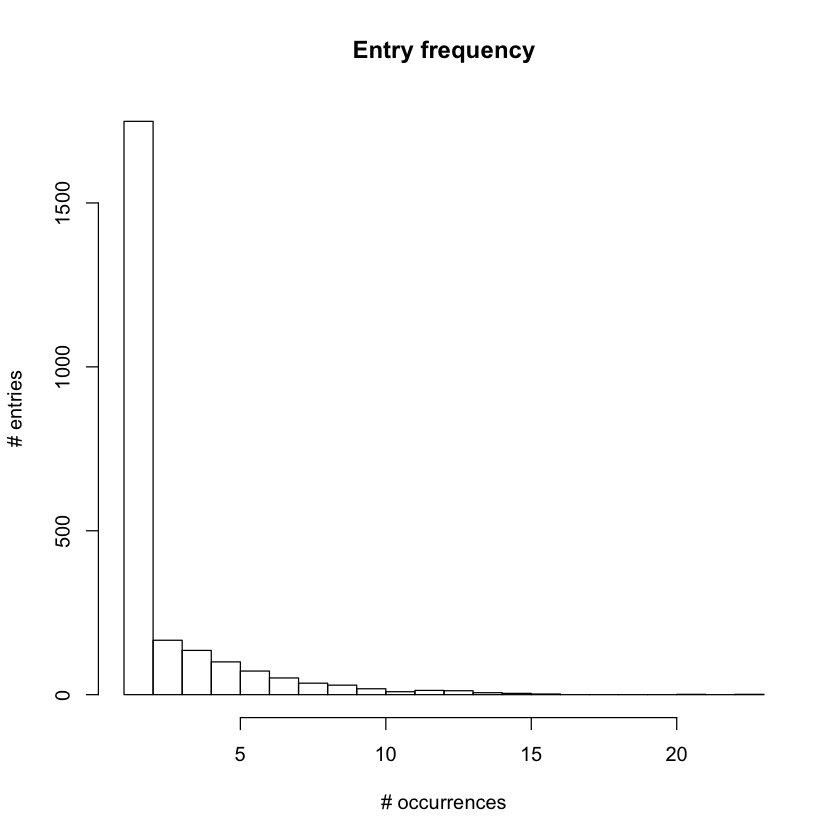

[1] "72.78% of entries appear only once or twice across the corpus"
[1] "66 entries occur in 10 or more documents"
[1] "including one that occurs 23 times across the 138 documents"
[1] "The most common entry is kid.da.twig.n"


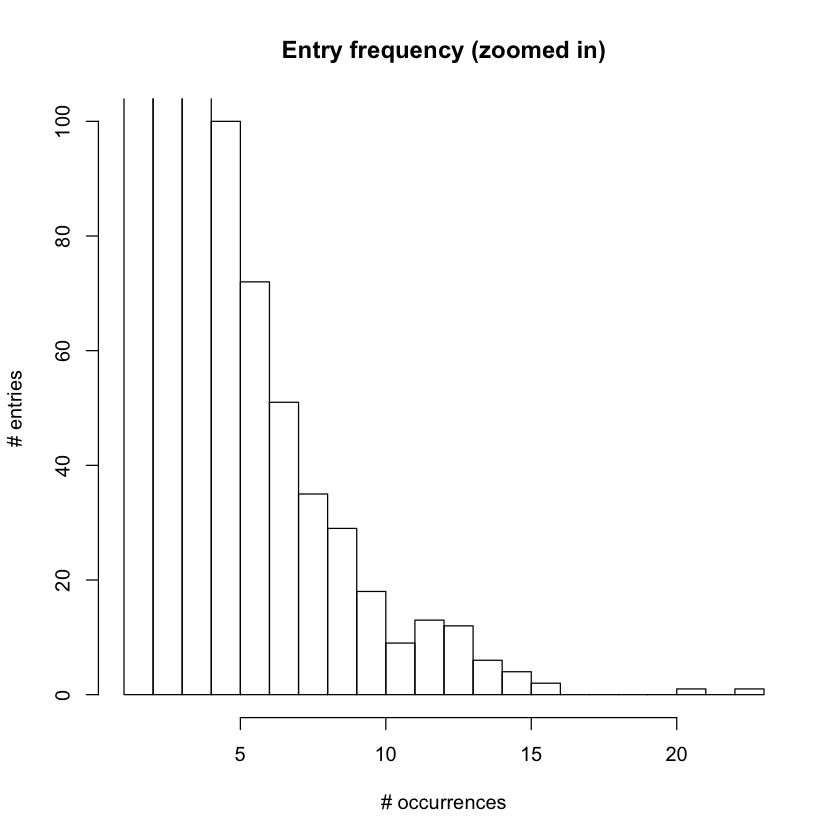

In [15]:
num_occurrences = unlist(dtm_df["num_occurrences",])
hist(num_occurrences, breaks = 30, main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurrences")
hist(num_occurrences, breaks = 30, ylim = c(0, 100), 
     main = "Entry frequency (zoomed in)", 
    ylab = "# entries", xlab = "# occurrences")

rare = round(length(which(dtm_df["num_occurrences",] <=2))/cols_to_sum*100,2)
common_entries = colnames(dtm_df[which(dtm_df["num_occurrences",] >=10)])
most_common = max(dtm_df["num_occurrences",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurrences",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(length(common_entries), "entries occur in 10 or more documents"))
print(paste("including one that occurs", most_common, "times across the", rows_to_sum, "documents"))
print(paste("The most common entry is", most_common_entry))

In [16]:
common_entries

[1] "al.hoe.n"                           "al.hoe.n_zu.tooth.n_eš.three.nu"   
 [3] "al.hoe.n_zu.tooth.n_limmu.four.nu"  "al.hoe.n_zu.tooth.n_min.two.nu"    
 [5] "allanum.oak.n"                      "apin.plow.n_tugsaga.plow.n"        
 [7] "apin.plow.n_šu.hand.n"              "apin.plow.n_šudu.equipped.aj"      
 [9] "dih.weed.n"                         "dilim.spoon.n"                     
[11] "e.house.n_gigir.chariot.n"          "ellag.ball.n"                      
[13] "esi.tree.n"                         "gigir.chariot.n"                   
[15] "girim.flower.n"                     "guza.chair.n"                      
[17] "guza.chair.n_gid.long.v.i"          "halub.tree.n"                      
[19] "hašhur.apple.n"                     "hašhur.apple.n_armanu.tree.n"      
[21] "hašhur.apple.n_kur.mountain.n"      "ildag.poplar.n"                    
[23] "ildag.poplar.n_kur.mountain.n"      "ilianum.tree.n"                    
[25] "kid.da.twig.n"                      "kur.wood.n"                        
[27] "lamgal.nut.n"                       "lamtur.nut.n"                      
[29] "ligima.shoot.n"                     "ma.ship.n_niš.twenty.nu_gur.unit.n"
[31] "ma.ship.n_u.ten.nu_gur.unit.n"      "madal.pole.n"                      
[33] "manu.wood.n"                        "margida.cart.n"                    
[35] "maš.plant.n"                        "mes.tree.n"                        
[37] "mud.stump.n_ŋešnimbar.palm.n"       "naŋa.mortar.n"                     
[39] "pa.branch.n_ŋešnimbar.palm.n"       "peš.fig.n"                         
[41] "su.fibers.n_ŋešnimbar.palm.n"       "sugin.rot.n"                       
[43] "sumungi.tool.n"                     "taškarin.boxwood.n"                
[45] "tiʾarum.tree.n"                     "tubala.harness.n_ŋešnimbar.palm.n" 
[47] "urnum.cedar.n"                      "zena.midrib.n_ŋešnimbar.palm.n"    
[49] "zirdum.olive.n"                     "ŋešaʾabak.tree.n"                  
[51] "ŋešgana.tree.n"                     "ŋešgana.tree.n_babbar.white.v.i"   
[53] "ŋešgana.tree.n_giggi.black.v.i"     "ŋešnimbar.palm.n"                  
[55] "ŋešnimbar.palm.n_šeŋ.cook.v.t"      "ŋeštin.vine.n"                     
[57] "ŋeštinguruma..vine.n"               "ŋeštinkaʾa.grape.n"                
[59] "ŋeštinkira.berry.n"                 "ŋipar.tree.n"                      
[61] "ŋirigub.footstool.n"                "šag.heart.n_ŋešnimbar.palm.n"      
[63] "šagkal.tree.n"                      "šedug.tree.n"                      
[65] "šennur.plum.n"                      "šenu.tree.n"

Next we will reorganize our data to enable pretty and informative plotting of entry distribution across documents and overall frequency.

First, we reorder the columns in our dataframe from alphabetical to
sorting by frequency so that the most common entries are clustered together for ease of visualization.

To do this, we first convert the frequency counts to presence/absence (binary), then reorder the columns by column sums.

In [17]:
# Convert to binary presence/absence information
dtm_df = as.matrix((dtm_df > 0) + 0)

dtm_df = dtm_df[,order(colSums(dtm_df), decreasing = TRUE)]
dtm_df = as.data.frame(dtm_df)

We then recalculate number of occurrences (of each entry across the corpus)
and number of entries (in each document). These are now binary, so they
represent:

num_occurrences = number of documents an entry is present in  
num_entries = number of unique entries in a document

In [19]:
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
dtm_df["num_occurrences",] = colSums(dtm_df[1:rows_to_sum,])
dtm_df["num_occurrences","num_entries"] = NA 

num_occurrences = unlist(dtm_df["num_occurrences",])
most_frequent = max(num_occurrences, na.rm = TRUE)
most_frequent_entry = colnames(dtm_df[which(dtm_df["num_occurrences",] == most_frequent)])

print(paste(table(num_occurrences)[1], "entries appear in only one document"))
print(paste("The entry that appears in the most documents is", most_frequent_entry))

table(num_occurrences, useNA = "ifany")


[1] "1506 entries appear in only one document"
[1] "The entry that appears in the most documents is peš.fig.n"    
[2] "The entry that appears in the most documents is šagkal.tree.n"


num_occurrences
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 <NA> 
1506  278  154  132  100   76   50   38   26   12    8    9    9    3    2    1 

In [24]:
# These entries appear in at least 10 different documents.
colnames(dtm_df)[which(dtm_df["num_occurrences",] >=10)]

[1] "peš.fig.n"                         "šagkal.tree.n"                    
 [3] "allanum.oak.n"                     "ŋeštin.vine.n"                    
 [5] "ŋeštinkira.berry.n"                "al.hoe.n"                         
 [7] "esi.tree.n"                        "gigir.chariot.n"                  
 [9] "hašhur.apple.n"                    "hašhur.apple.n_kur.mountain.n"    
[11] "ildag.poplar.n"                    "lamgal.nut.n"                     
[13] "ŋeštinguruma..vine.n"              "šennur.plum.n"                    
[15] "e.house.n_gigir.chariot.n"         "ildag.poplar.n_kur.mountain.n"    
[17] "ilianum.tree.n"                    "lamtur.nut.n"                     
[19] "tiʾarum.tree.n"                    "urnum.cedar.n"                    
[21] "ŋeštinkaʾa.grape.n"                "ŋipar.tree.n"                     
[23] "šedug.tree.n"                      "dilim.spoon.n"                    
[25] "halub.tree.n"                      "manu.wood.n"                      
[27] "margida.cart.n"                    "tubala.harness.n_ŋešnimbar.palm.n"
[29] "ŋešgana.tree.n"                    "ŋešnimbar.palm.n"                 
[31] "šenu.tree.n"                       "al.hoe.n_zu.tooth.n_min.two.nu"   
[33] "guza.chair.n"                      "guza.chair.n_gid.long.v.i"        
[35] "hašhur.apple.n_armanu.tree.n"      "kid.da.twig.n"                    
[37] "ma.ship.n_u.ten.nu_gur.unit.n"     "mud.stump.n_ŋešnimbar.palm.n"     
[39] "naŋa.mortar.n"                     "taškarin.boxwood.n"               
[41] "ŋešaʾabak.tree.n"                  "ŋešgana.tree.n_babbar.white.v.i"  
[43] "ŋešgana.tree.n_giggi.black.v.i"

In [25]:
#add document names as row names
dtm_df$document = rownames(dtm_df)

# remove num_occurances row
dtm_df = dtm_df[-which(rownames(dtm_df) == "num_occurrences"),]

# remove num_entries column
dtm_df$num_entries = NULL

The melted `dtm` indicates for each entry whether or not it is present in each document.
# Erin
Is that a correct description? Why do we need a melted `dtm`? (I guess we do need that - suggested in this [post](https://stackoverflow.com/questions/34375581/how-to-represent-a-term-document-matrix-like-heatmap-and-word-cloud-in-r)).


In [32]:
melted_dtm_df = melt(dtm_df)
head(melted_dtm_df)

Using document as id variables


document variable  value
1 P117395  peš.fig.n 0    
2 P117404  peš.fig.n 0    
3 P128345  peš.fig.n 0    
4 P224980  peš.fig.n 0    
5 P224986  peš.fig.n 0    
6 P224994  peš.fig.n 0

document variable               value
331609 P459231  šuʾa.stool.n_šu.hand.n 0    
331610 P459784  šuʾa.stool.n_šu.hand.n 0    
331611 P492330  šuʾa.stool.n_šu.hand.n 0    
331612 Q000001  šuʾa.stool.n_šu.hand.n 0    
331613 Q000039  šuʾa.stool.n_šu.hand.n 0    
331614 X100003  šuʾa.stool.n_šu.hand.n 0

In [ ]:
# Preview a subset of the data to make sure ggplot is working
#q = qplot(data = melted_dtm_df[1:1000,], x=variable, y=document, fill=factor(value),
#     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8), axis.text.y = element_text(size = 5))
#
#suppressWarnings(print(q))


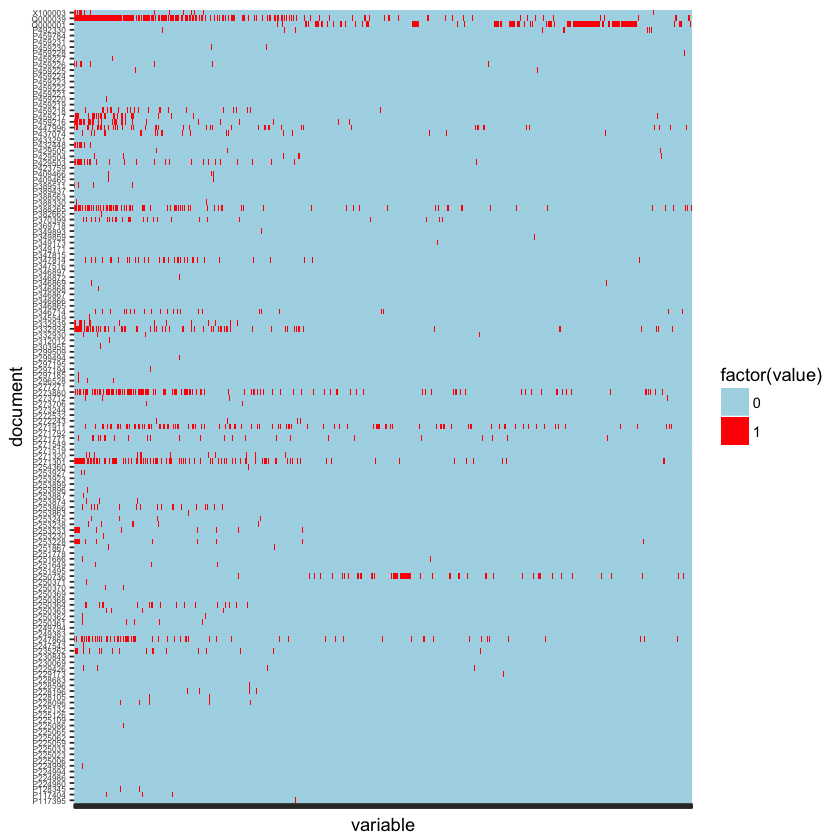

In [29]:
# http://stackoverflow.com/questions/10397183/heat-map-of-binary-data-using-r-or-python

q = qplot(data = melted_dtm_df, x=variable, y=document, fill=factor(value),
     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
theme(axis.text.x=element_blank(), axis.text.y = element_text(size = 5))

suppressWarnings(print(q))

# Commentary
This heatmap makes some sense if the right 2/3 of the graph represents words that appear only once throughout the corpus. Otherwise it is hard to understand how the [Q000001](http://oracc.org/dcclt/Q000001) entries (animals) can appear there. Can we select for words that appear in [Q000001](http://oracc.org/dcclt/Q00001) *and* appear in more than one document?

## Grouping Documents by Entry Similarity  
We can use hierarchical clustering with our presence/absence matrix to uncover groups of similar documents. Ideally, we can benchmark these clusters' accuracy in uncovering geographically or chronologically related documents by looking at metadata, but for this collection the metadata may be too sparse to do that benchmarking.  

In either case, we can establish a workflow for doing hierarchical clustering and apply that to other datasets with better provenance information to test for cluster utility.  

## Adding provenience by using [ORACC](http://oracc.org) metadata

In [33]:
# Bring in metadata
metadata = read.csv("../data/metadata/dcclt_cat.csv")
metadata$document = metadata$X
metadata$X = NULL
head(metadata)

designation period   provenience museum_no document
1 W 06435,a   Uruk III Uruk        VAT 01533 P000001 
2 W 06435,b   Uruk III Uruk        VAT 15263 P000002 
3 W 09123,d   Uruk IV  Uruk        VAT 15253 P000003 
4 W 09169,d   Uruk IV  Uruk        VAT 15168 P000004 
5 W 09206,k   Uruk IV  Uruk        VAT 15153 P000005 
6 W 09656,h1  Uruk IV  Uruk        VAT 15003 P000006

In [34]:
# Drop metadata for documents not in this dataset
docs = unique(rownames(dtm_df))
metadata = metadata[which(metadata$document %in% docs),]
nrow(metadata)

[1] 138

In [35]:
#remove document column
dtm_df$document = NULL

clusters <- hclust(dist(dtm_df))

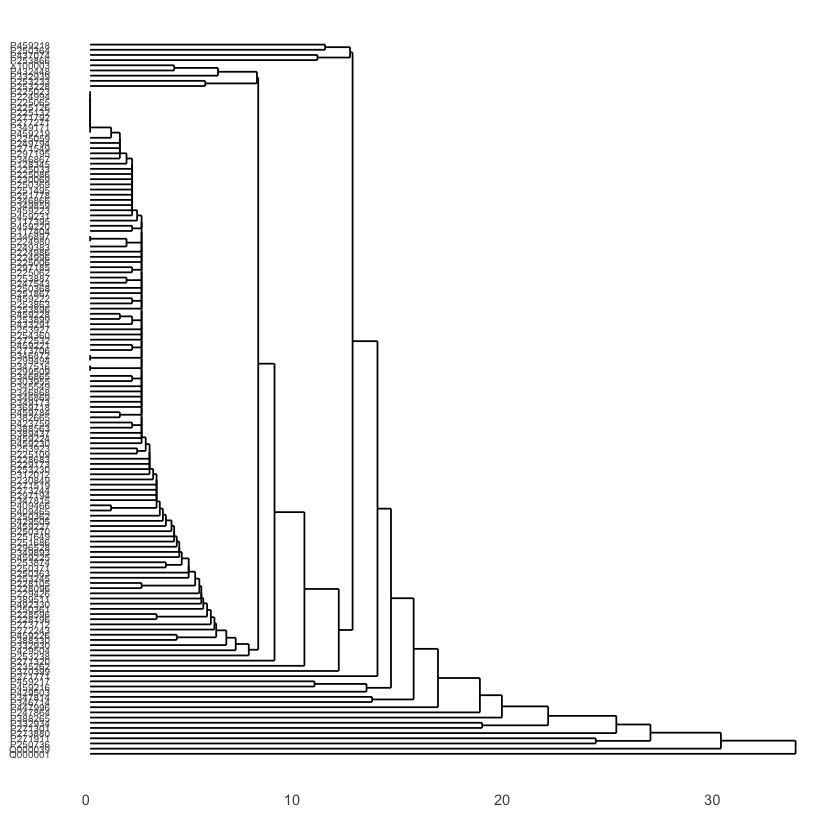

In [38]:
ggdendrogram(clusters, rotate = TRUE) + theme(axis.text.y = element_text(size = 6))

# Commentary
The two texts that do not belong are [Q000001](http://oracc.org/dcclt/Q000001) and [P250736](http://oracc.org/dcclt/P250736). Both end up - together with [Q000039](http://oracc.org/dcclt/Q000039)! - in the bottom of the graph.

Two clusters of texts (9 documents) in the top of the graph seem to have little relation to each other:

| text | period | provenience |
|------|--------|-------------|
|[P459218](http://oracc.org/dcclt/P459218)| OB | Isin |
|[P250364](http://oracc.org/dcclt/P250364)| OB | unknown (Ur?) |
|[P437074](http://oracc.org/dcclt/P437074)| MB | Hattuša |
|[P253866](http://oracc.org/dcclt/P253866)| OB | unknown |
|-------------------------------|----|---------|
|[X100003](http://oracc.org/dcclt/X100003)| MB | Ibn Hani (Ugarit)|
|[P432448](http://oracc.org/dcclt/P432448)| OB | unknown |
|[P332939](http://oracc.org/dcclt/P332939)| MB | Ugarit|
|[P253233](http://oracc.org/dcclt/P253233)| OB | unknown|
|[P253228](http://oracc.org/dcclt/P253228)| OB | unknown|

There are four texts that have the rare item *ne-gi-pu-um* also spelled *ne-ki-pu-um*, namely
* [P247864](http://oracc.org/dcclt/P247864) from Šaduppum
* [P273880](http://oracc.org/dcclt/P273880) unknown provenance
* [P388265](http://oracc.org/dcclt/P388265) unknown provenance
* [P347814](http://oracc.org/dcclt/P347814) unknown provenance

In all these cases the word is preceded by an (equally rare) synonym *ka-ta-pu-um*. Both words are unknown in later lexical tradition.

The four texts are more or less grouped towards the bottom of the graph - they are linked at a fairly high level (can we highlight them?)

The category "Isin" is more or less meaningless. This includes some very short (3-line) texts that do not have much in common with each other (and overlap of max. three lines with the longer texts). The three longer texts include
* [P459218](http://oracc.org/dcclt/P459218) second half of the list
* [P459217](http://oracc.org/dcclt/P459217) first half of the list
* [P459216](http://oracc.org/dcclt/P459216) first half of the list

The first, predictably, does not correlate with the other two, but the last two do link. They are reasonably close to [P235262](http://oracc.org/dcclt/P235262)(KM 89542; unprovenanced), which seems to be closely related to the Isin tradition. In between the Isin texts. In between KM 89542 and the Isin texts are [P370399](http://oracc.org/dcclt/P370399) (unprovenanced) and [P271771](http://oracc.org/dcclt/P271771) (Emar). The Emar text is MB (all the others listed are OB), but belongs to the so-called "Syrian" tradition in Emar that is much closer to the OB tradition than other Emar texts. All these texts are of substantial length - it is possible that we have a real connection here.

[P346714](http://oracc.org/dcclt/P346714) (from Ur) and [P250364](http://oracc.org/dcclt/P250364) (unprovenanced, tradition looks like Ur) end up at different ends of the graph.

Texts from Ugarit and Ibn Hani and some from Emar are supposed to be closely related. Can we pull them out?

Conclusions: very short texts do not yield interpretable results and can only be used if they have a rare item or rare spelling.
The "Isin" group needs more research. Display heatmaps of smaller groups of texts?


[1] 16

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”

 [1] ""          "Emar"      "Hattusa"   "Ibn Hani"  "Isin"      "Kabnak"   
 [7] "Kish"      "Nerebtum"  "Nippur"    "Nuzi"      "Šaduppum"  "Shaduppum"
[13] "Ugarit"    "uncertain" "Ur"        "Uruk"     


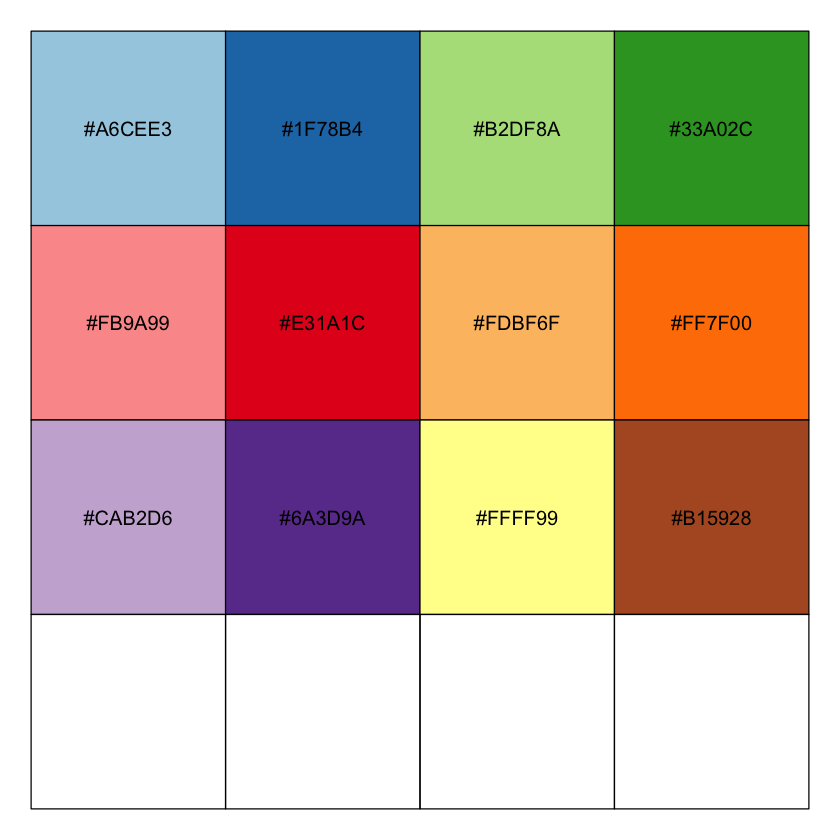

In [39]:
# Add colors to dendrogram by provenance
numColors = length(levels(factor(metadata$provenience)))
numColors
myPalette = brewer_pal(palette = "Paired")(numColors)
names(myPalette) = levels(factor(metadata$provenience))
print(names(myPalette))
show_col(myPalette)

In [40]:
dtm_df$document = rownames(dtm_df)
dtm_df = merge(dtm_df, metadata, by = "document")

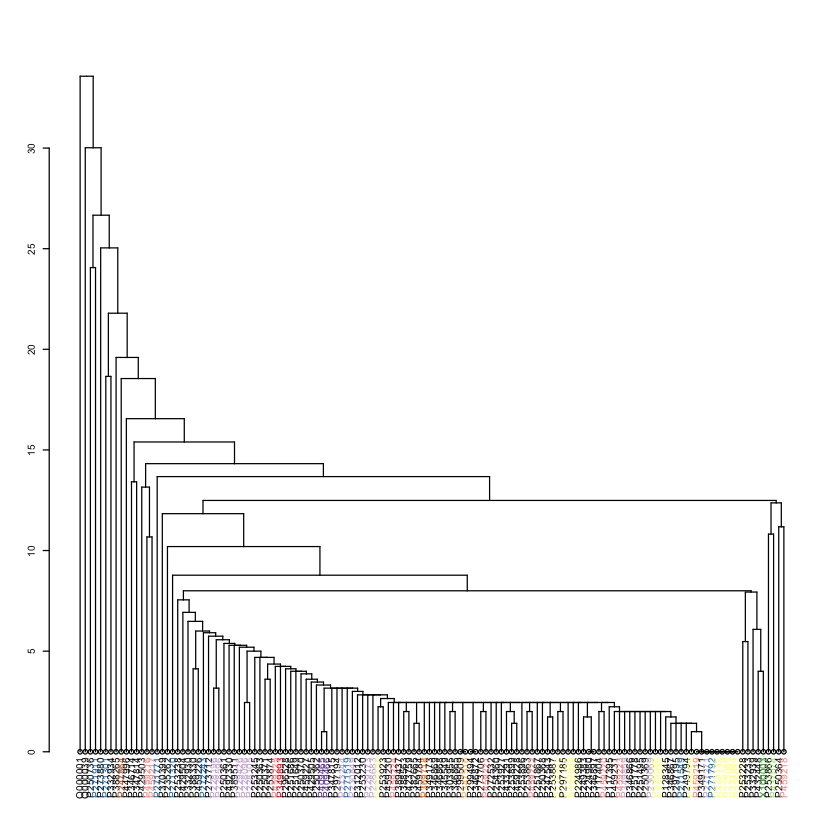

In [41]:
labelCol = function(x) {
  if (is.leaf(x)) {
    # fetch label
    label = attr(x, "label")
    # print(label)
    group = metadata[which(metadata$document == label),"provenience"]
    group_col = unname(myPalette[as.character(group)])
#    attr(x, "nodePar") = list(lab.col = ifelse(label %in% c("A", "B"), "red", "blue"))
    attr(x, "nodePar") = list(lab.col = group_col)
  }
  return(x)
}

## apply labelCol on all nodes of the dendrogram
par(cex=0.5)
plot(dendrapply(as.dendrogram(clusters), labelCol))

[1] 2

[1] "Middle Babylonian" "Old Babylonian"   


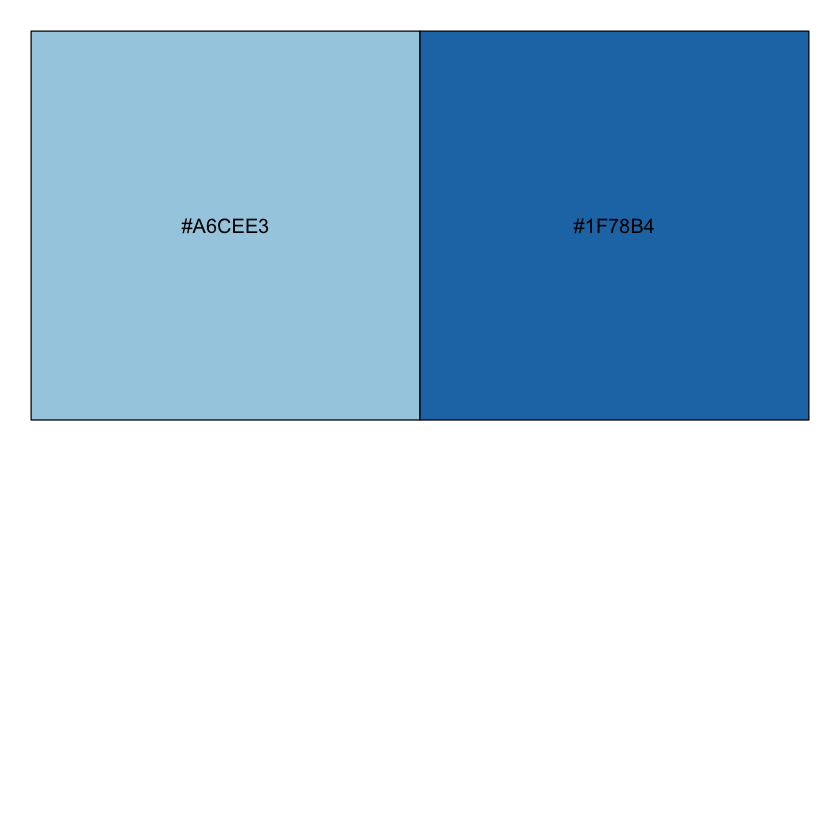

In [42]:
# Add colors to dendrogram by period
numColors = length(levels(factor(metadata$period)))
numColors
myPalette = brewer_pal(palette = "Paired")(numColors)
names(myPalette) = levels(factor(metadata$period))
print(names(myPalette))
show_col(myPalette)

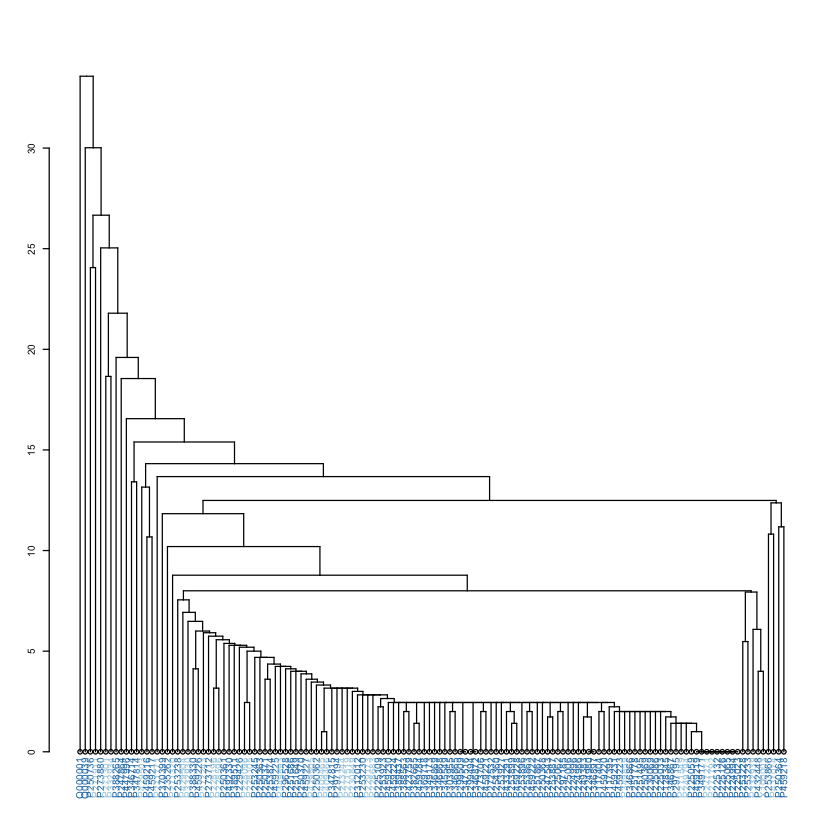

In [43]:
labelCol = function(x) {
  if (is.leaf(x)) {
    # fetch label
    label = attr(x, "label")
    # print(label)
    group = metadata[which(metadata$document == label),"period"]
    group_col = unname(myPalette[as.character(group)])
    attr(x, "nodePar") = list(lab.col = group_col)
  }
  return(x)
}

## apply labelCol on all nodes of the dendrogram
par(cex=0.5)
plot(dendrapply(as.dendrogram(clusters), labelCol))